In [109]:
from msvcrt import SEM_NOALIGNMENTFAULTEXCEPT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from typing import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import warnings
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Dropout
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE


In [110]:
df=pd.read_csv('train_3.2.csv')
df
df.drop(['id'], axis=1)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


Удалили столбей id. Нет смысловой нагрузки.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [112]:
df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


Все данные полны, пропусков и категориальных переменных нет

In [113]:
X=df.drop(['defects'], axis=1)
y=df['defects']

разделили на фичи и таргет

In [114]:
X_train, X_val, y_train_pd, y_val_pd = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
y_train, y_val = y_train_pd.to_numpy(), y_val_pd.to_numpy()

разбили на части

In [115]:
count = Counter(y_train)
count


Counter({False: 62959, True: 18451})

Видим дисбаланс

In [116]:
smote=SMOTE(random_state=42)
X_train, y_train=smote.fit_resample(X_train,y_train)

применили SMOTE

In [117]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [118]:
count = Counter(y_train)
count

Counter({False: 62959, True: 62959})

Отбалансировали

In [119]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['AUC']
                  )
    
    return model

In [120]:
early_stopping = EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max')


In [121]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1., 1.])

In [122]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.5231 - loss: 7.0967 - val_AUC: 0.7351 - val_loss: 1.5720
Epoch 2/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5192 - loss: 6.7697 - val_AUC: 0.7213 - val_loss: 1.7318
Epoch 3/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5153 - loss: 6.6099 - val_AUC: 0.6979 - val_loss: 1.9620
Epoch 4/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5111 - loss: 6.5677 - val_AUC: 0.6962 - val_loss: 1.9897
Epoch 5/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5143 - loss: 6.4614 - val_AUC: 0.6915 - val_loss: 2.0585
Epoch 6/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5146 - loss: 6.4020 - val_AUC: 0.6770 - val_loss: 2.2050
Epoch 7/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5115 - loss: 6.4438 - val_AUC: 0.6715 - val_loss: 2.2598
Epoch 8/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5152 - loss: 6.3708 - val_AUC: 0.6638 - val_loss: 2.3313
Epoch 9/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AU

In [123]:
history.history

{'AUC': [0.5255990624427795,
  0.5207796096801758,
  0.5159164667129517,
  0.5121979117393494,
  0.5134732723236084,
  0.5153964161872864,
  0.5120955109596252,
  0.5155180096626282,
  0.5134830474853516,
  0.5139894485473633,
  0.516086220741272,
  0.5107098817825317,
  0.514839231967926,
  0.5128806829452515,
  0.5133042335510254,
  0.5146292448043823,
  0.5149282217025757,
  0.5147669315338135,
  0.515714168548584,
  0.5143628120422363],
 'loss': [6.897584915161133,
  6.690834045410156,
  6.583475589752197,
  6.536444664001465,
  6.472496032714844,
  6.399156093597412,
  6.406180381774902,
  6.3661394119262695,
  6.345236301422119,
  6.3331732749938965,
  6.280491352081299,
  6.312790393829346,
  6.238142013549805,
  6.242769241333008,
  6.238978862762451,
  6.222020149230957,
  6.212891578674316,
  6.22118616104126,
  6.201979160308838,
  6.204505443572998],
 'val_AUC': [0.7351081967353821,
  0.7213116884231567,
  0.6979294419288635,
  0.6962106227874756,
  0.6915186047554016,
  0.

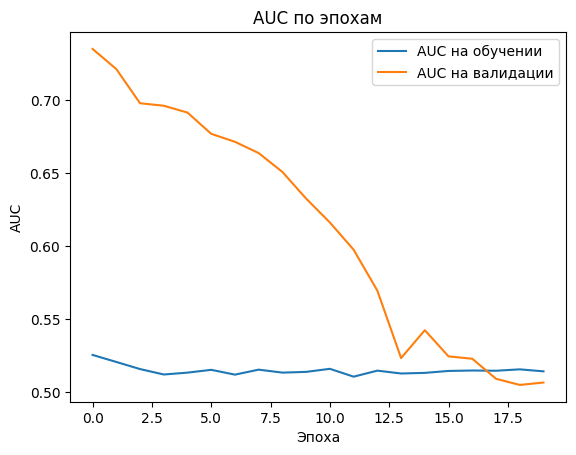

In [124]:
plt.plot(history.history['AUC'], label='AUC на обучении')
plt.plot(history.history['val_AUC'], label='AUC на валидации')
plt.title('AUC по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [125]:
val_loss, val_auc = model.evaluate(X_val, y_val)
print(f'Потери на валидации: {val_loss}, AUC на валидации: {val_auc}')

637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - AUC: 0.5051 - loss: 3.6260
Потери на валидации: 3.604048252105713, AUC на валидации: 0.5066971182823181


Полученая модель показывает плохие результаты.